In [2]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Loading Data of Alphabet Inc. (GOOG) stock - Historical Data 

In [3]:
google = web.DataReader('GOOG', data_source = 'yahoo', start = '1/1/2010', end = '1/1/2022') # loading data
google = google.drop('Volume', axis = 1) # deleting column Vol
google.head()

High        Low       Open      Close  Adj Close
Date                                                             
2014-03-27  28.322241  27.570307  28.322241  27.846546  27.846546
2014-03-28  28.243956  27.857019  27.983171  27.922838  27.922838
2014-03-31  28.272379  27.770258  28.266893  27.772251  27.772251
2014-04-01  28.344681  27.859013  27.859013  28.280355  28.280355
2014-04-02  30.158699  28.032537  29.917362  28.272379  28.272379

In [4]:
google['Index_of_the_day'] = range(0, len(google.index.values))
google.head()

High        Low       Open      Close  Adj Close  \
Date                                                                
2014-03-27  28.322241  27.570307  28.322241  27.846546  27.846546   
2014-03-28  28.243956  27.857019  27.983171  27.922838  27.922838   
2014-03-31  28.272379  27.770258  28.266893  27.772251  27.772251   
2014-04-01  28.344681  27.859013  27.859013  28.280355  28.280355   
2014-04-02  30.158699  28.032537  29.917362  28.272379  28.272379   

            Index_of_the_day  
Date                          
2014-03-27                 0  
2014-03-28                 1  
2014-03-31                 2  
2014-04-01                 3  
2014-04-02                 4

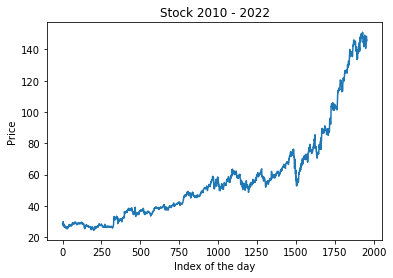

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('Index of the day')
ax1.set_ylabel('Price')
ax1.set_title('Stock 2010 - 2022')
ax1.plot('Index_of_the_day', 'Open', data = google)

### Sampling Dataset

In [19]:
one_hundred = google.sample(frac = 0.1, random_state = np.random.randint(100))
one_hundred.head()

High          Low         Open        Close    Adj Close  \
Date                                                                          
2017-03-15   848.630005   840.770020   847.590027   847.200012   847.200012   
2021-03-04  2089.239990  2020.270020  2023.369995  2049.090088  2049.090088   
2011-04-05   289.659271   281.783813   289.455048   283.482452   283.482452   
2012-11-12   333.649414   329.201080   330.635681   331.706696   331.706696   
2010-09-03   235.058945   232.847229   234.381485   234.271896   234.271896   

            Index_of_the_day  
Date                          
2017-03-15              1811  
2021-03-04              2810  
2011-04-05               316  
2012-11-12               720  
2010-09-03               169

In [20]:
one_hundred.index.name = None # deleting name of the index (Date)
one_hundred = one_hundred.sort_values(by='Index_of_the_day', ascending = True)
one_hundred.head()

High         Low        Open       Close   Adj Close  \
2010-01-19  294.107605  287.069000  289.514832  292.712830  292.712830   
2010-01-26  273.773834  267.143677  267.980530  270.197235  270.197235   
2010-02-04  267.995483  261.798706  267.497345  262.406433  262.406433   
2010-02-05  265.753876  260.254517  263.213409  264.653015  264.653015   
2010-02-17  270.685394  267.801208  269.988007  268.100098  268.100098   

            Index_of_the_day  
2010-01-19                10  
2010-01-26                15  
2010-02-04                22  
2010-02-05                23  
2010-02-17                30

Text(0, 0.5, 'Price')

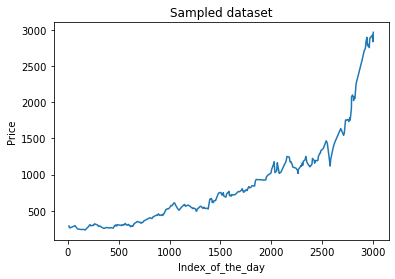

In [21]:
axes = one_hundred.plot('Index_of_the_day', 'Open', legend = False, title = 'Sampled dataset')
axes.set_ylabel('Price')

Text(0.5, 1.0, 'Sampled Plot')

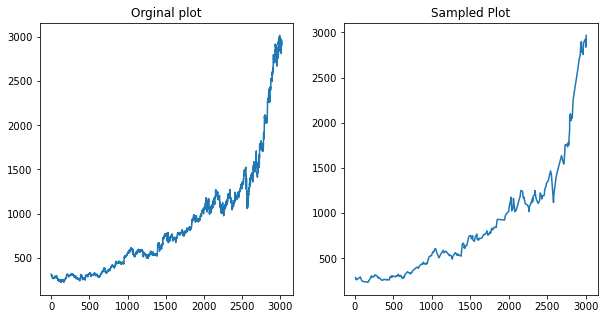

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0].plot('Index_of_the_day', 'Open', data = google)
axes[0].set_title('Orginal plot')
axes[1].plot('Index_of_the_day', 'Open', data = one_hundred)
axes[1].set_title('Sampled Plot')

### Rolling Mean

In [23]:
google = google.reset_index() # adding index as new col
google.head()

Date        High         Low        Open       Close   Adj Close  \
0 2010-01-04  313.579620  310.954468  312.304413  312.204773  312.204773   
1 2010-01-05  312.747742  309.609497  312.418976  310.829926  310.829926   
2 2010-01-06  311.761444  302.047852  311.761444  302.994293  302.994293   
3 2010-01-07  303.861053  295.218445  303.562164  295.940735  295.940735   
4 2010-01-08  300.498657  293.455048  294.894653  299.885956  299.885956   

   Index_of_the_day  
0                 0  
1                 1  
2                 2  
3                 3  
4                 4

In [24]:
google['Rolling_Mean'] = google['Open'].rolling(window = 200).mean() # every 200 position has assigned mean value 199:0-199, 200:1-200 etc. it starts in 199 index so before 199 there are NaNs
google.iloc[199]

Date                2010-10-18 00:00:00
High                         308.687958
Low                          299.153687
Open                         299.153687
Close                         307.70166
Adj Close                     307.70166
Index_of_the_day                    199
Rolling_Mean                 258.800552
Name: 199, dtype: object

Text(0.5, 1.0, 'Smoothed Plot (Rolling_Mean)')

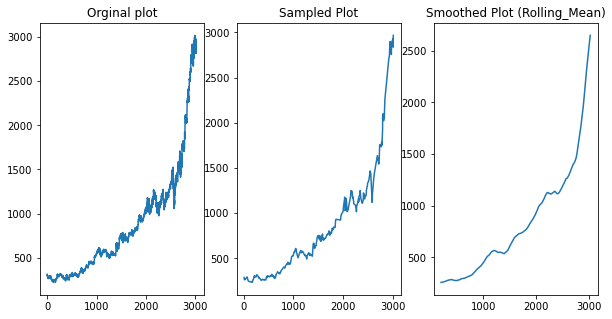

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))
axes[0].plot('Index_of_the_day', 'Open', data = google)
axes[0].set_title('Orginal plot')
axes[1].plot('Index_of_the_day', 'Open', data = one_hundred)
axes[1].set_title('Sampled Plot')
axes[2].plot('Index_of_the_day', 'Rolling_Mean', data = google)
axes[2].set_title('Smoothed Plot (Rolling_Mean)')

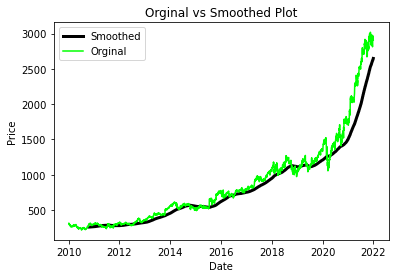

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(google['Date'], google['Rolling_Mean'], color = (0,0,0), linewidth = 3, label = 'Smoothed')
ax.plot(google['Date'], google['Open'], color = (0,1,0), label = 'Orginal')
ax.set_title('Orginal vs Smoothed Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')

In [27]:
filt_google = google[(google['Index_of_the_day'] >= 500) & (google['Index_of_the_day'] < 2000)]
filt_google.head()

Date        High         Low        Open       Close   Adj Close  \
500 2011-12-27  321.041656  314.819977  314.844879  318.929565  318.929565   
501 2011-12-28  321.295715  317.858582  320.174896  318.655609  318.655609   
502 2011-12-29  320.299438  316.414001  319.547272  320.000549  320.000549   
503 2011-12-30  322.172424  319.811279  319.811279  321.744019  321.744019   
504 2012-01-03  332.827484  324.966949  325.250885  331.462585  331.462585   

     Index_of_the_day  Rolling_Mean  
500               500    277.779414  
501               501    277.991743  
502               502    278.174757  
503               503    278.367884  
504               504    278.587809

### Linear regression - Predictions

In [28]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression().fit(filt_google[['Index_of_the_day']], filt_google[['Rolling_Mean']]) # columns in lists because we need DataFrame data type, not series
m = model.coef_[0]  # y = mx + b // coef_ calculates coefficient m
b = model.intercept_ # intercept_ calculates coefficient b
print('y = ', round(m[0],2), 'x + ', round(b[0],2))

[[0.41367918]]
y =  0.41 x +  31.38


In [30]:
type(filt_google[['Index_of_the_day']])

pandas.core.frame.DataFrame

In [31]:
predictions = model.predict(filt_google[['Index_of_the_day']])
predictions[0:10]

array([[238.22347839],
       [238.63715757],
       [239.05083674],
       [239.46451592],
       [239.87819509],
       [240.29187427],
       [240.70555344],
       [241.11923262],
       [241.5329118 ],
       [241.94659097]])

In [32]:
predictions = pd.DataFrame(data = predictions, index = filt_google.index.values, columns = ['Pred'])
predictions.head()

Pred
500  238.223478
501  238.637158
502  239.050837
503  239.464516
504  239.878195

In [33]:
joined_df = filt_google.join(predictions, how = 'inner')
joined_df.head()

Date        High         Low        Open       Close   Adj Close  \
500 2011-12-27  321.041656  314.819977  314.844879  318.929565  318.929565   
501 2011-12-28  321.295715  317.858582  320.174896  318.655609  318.655609   
502 2011-12-29  320.299438  316.414001  319.547272  320.000549  320.000549   
503 2011-12-30  322.172424  319.811279  319.811279  321.744019  321.744019   
504 2012-01-03  332.827484  324.966949  325.250885  331.462585  331.462585   

     Index_of_the_day  Rolling_Mean        Pred  
500               500    277.779414  238.223478  
501               501    277.991743  238.637158  
502               502    278.174757  239.050837  
503               503    278.367884  239.464516  
504               504    278.587809  239.878195

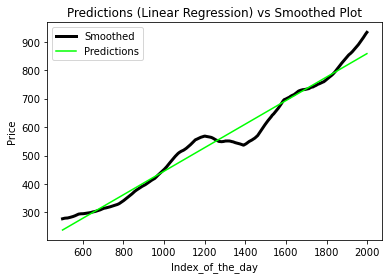

In [34]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(joined_df['Index_of_the_day'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 3, label = 'Smoothed')
ax.plot(joined_df['Index_of_the_day'], joined_df['Pred'], color = (0,1,0), label = 'Predictions')
ax.set_title('Predictions (Linear Regression) vs Smoothed Plot')
ax.set_xlabel('Index_of_the_day')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')

In [48]:
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'], joined_df['Pred'], multioutput = 'uniform_average')
r_squared

0.9720673506060259